In [30]:
import pandas as pd
import numpy as np
import math
df=pd.read_csv("/Users/mac/code/Sebban77/07-ML-Ops/01-Train-at-scale/data-train-at-scale/prelectureMLops/project/data/query_2009-01-01_2015-01-01_200k.csv")
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1
...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1


(array([  320., 62729.,     0., 13420.,     0.,  4068.,  1950.,     0.,
         6375.,  1881.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

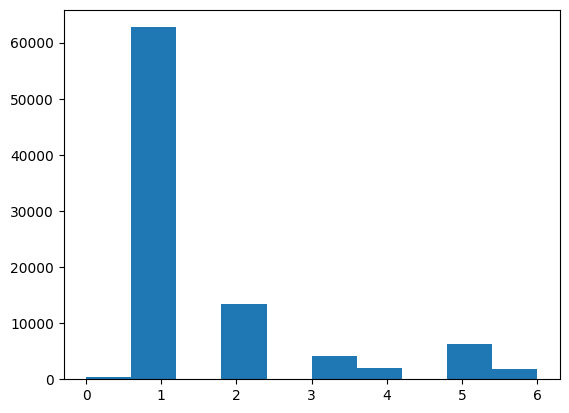

In [3]:
import matplotlib.pyplot as plt

plt.hist(df.passenger_count)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
def passenger_scale(df):
    scaler = MinMaxScaler()
    df['passenger_count_scaled'] = scaler.fit_transform(df[['passenger_count']])
    return df
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in kilometers
    dlon = np.radians(lon2 - lon1)
    dlat = np.radians(lat2 - lat1)

    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
         np.sin(dlon / 2) ** 2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

In [6]:
# date time treatment
import datetime
def date_time_to_day(df):
    date = datetime.date(df['pickup_datetime'])
    day= date.weekday()
    return day

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90743 entries, 0 to 90742
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   fare_amount        90743 non-null  float64            
 1   pickup_datetime    90743 non-null  datetime64[ns, UTC]
 2   pickup_longitude   90743 non-null  float64            
 3   pickup_latitude    90743 non-null  float64            
 4   dropoff_longitude  90743 non-null  float64            
 5   dropoff_latitude   90743 non-null  float64            
 6   passenger_count    90743 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 4.8 MB


In [9]:
df['day_name'] = df['pickup_datetime'].dt.day_of_week
df = df.drop( columns= 'pickup_datetime')

In [10]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_name
0,4.20,-73.982410,40.782397,-73.978177,40.783295,1,3
1,11.80,-74.006797,40.716359,-73.978616,40.752433,2,3
2,26.60,-73.982930,40.742167,-73.896904,40.843012,1,3
3,19.80,-73.983822,40.729471,-73.982300,40.776622,2,3
4,3.40,-74.013008,40.706021,-74.012851,40.702645,1,3
...,...,...,...,...,...,...,...
90738,14.50,-73.980395,40.742585,-73.994602,40.769627,1,2
90739,9.50,-73.962421,40.794752,-73.940646,40.814270,2,2
90740,74.16,-73.783610,40.648637,-74.091878,40.626073,2,2
90741,8.50,-73.995097,40.752067,-73.981982,40.766362,1,2


(array([11617., 12841.,     0., 13085.,     0., 13474., 13960.,     0.,
        13844., 11922.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

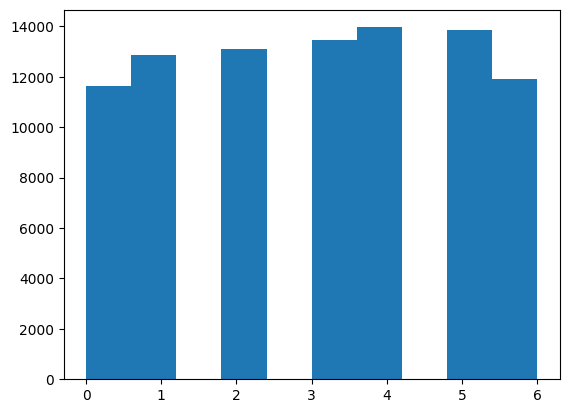

In [11]:
plt.hist(df['day_name'])

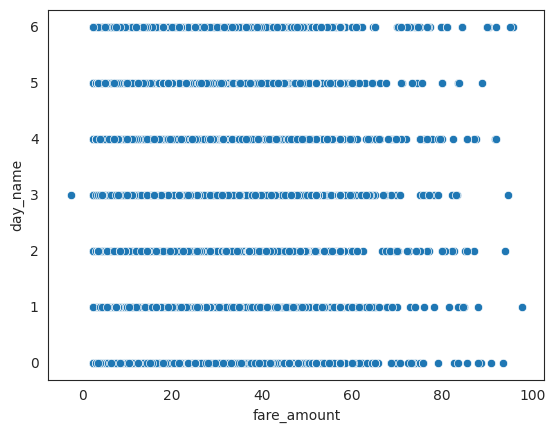

In [25]:
import seaborn as sns
with sns.axes_style("white"):
    sns.scatterplot(x='fare_amount', y='day_name', data=df)


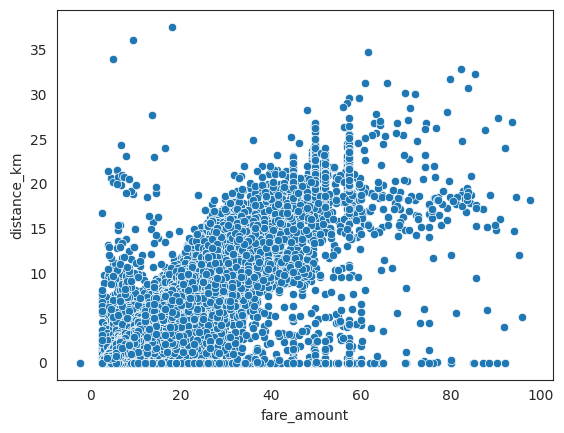

In [24]:
with sns.axes_style("white"):
    sns.scatterplot(x='fare_amount', y='distance_km', data=df)

In [23]:
df= df[df['fare_amount']< 100]
df= df[df['distance_km']< 40]

In [31]:
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

In [33]:
df[df['passenger_count']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
209,2.5,2009-01-07 17:50:31+00:00,-73.137393,41.366138,-73.137393,41.366138,0,0.000000
28494,13.3,2010-11-28 13:40:28+00:00,-73.776715,40.645297,-73.791230,40.667452,0,2.751030
29421,4.5,2010-12-19 14:37:55+00:00,-73.993757,40.746520,-73.998228,40.735308,0,1.302379
29625,5.3,2010-12-24 13:57:59+00:00,-73.967743,40.769217,-73.966312,40.761945,0,0.817541
29672,5.7,2010-12-26 15:17:18+00:00,-73.984412,40.748295,-73.983110,40.756003,0,0.864079
...,...,...,...,...,...,...,...,...
50820,4.1,2012-04-30 06:25:09+00:00,-73.971047,40.787683,-73.968835,40.792497,0,0.566759
50834,8.5,2012-04-30 15:26:03+00:00,-73.967342,40.803543,-73.982395,40.777438,0,3.167310
50844,6.1,2012-04-30 19:30:05+00:00,-73.999263,40.733963,-73.985958,40.734918,0,1.126059
50854,8.9,2012-04-30 21:38:37+00:00,-73.951202,40.791157,-73.949948,40.821932,0,3.423651


<Axes: >

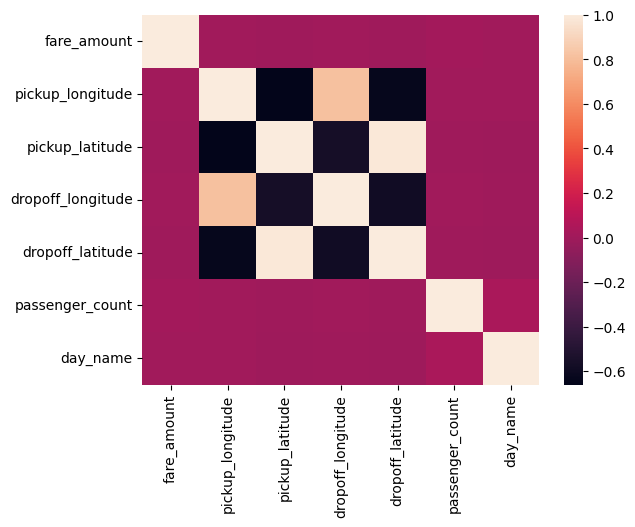

In [15]:
sns.heatmap(df.corr())

In [16]:
from sklearn.model_selection import train_test_split
X = df[['distance_km', 'passenger_count', 'day_name']]
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['distance_km'] not in index"

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
        model.add(layers.Dense(10, activation='relu', input_dim=self.X_train.shape[-1])) # highly recommend this option
        model.add(layers.Dense(7, activation='relu'))                               # instead of input_dim = 13
        model.add(layers.Dense(1, activation='linear'))
        model.fit(X_train,y_train)